# Generators

## Yielding and Generator Functions

The yield keyword:
- it emits a value,
- the function is effectively suspended (but it retains its current state),
- calling next on the function resumes running the function right after the yield statement,
- it function returns something instead of yielding (finishes running) -> StopIteration exception.

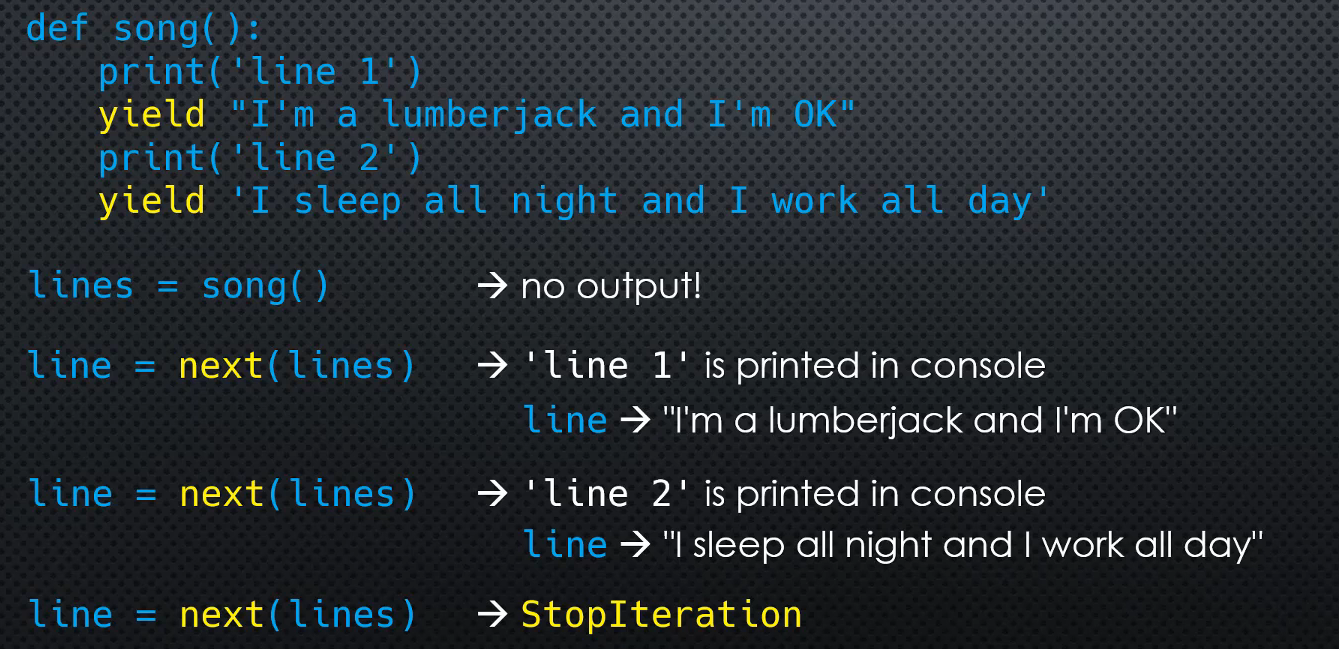

A function that uses the yield statement, is called a <b>generator function</b>. <br>
def my_func(): <br>
____yield 1 <br>
____yield 2 <br>
____yield 3 <br>
<br>
my_func is just regular function. Calling my_func() returns a generator object. <br>
We can think of functions that contain the yield statement as generator factories.<br>
The generator is created by Python when the function is called -> gen = my_func()<br>
The resulting generator is executed by calling next() -> next(gen)<br>
The function body will execute until it encounters a yield statement<br>
It <b>yields</b> the values (as return value of next()) then it <b>suspends</b> itself until next is called again -> suspended function <b>resumes</b> execution.
If it encounters a return <b>before</b> a yield -> StopIteration execption occurs.

In fact, generators are iterators as they implement the iterator protocol.

Recap:
- Generator functions are function which contain at least one yield statement.
- When a generator function is called, Python creates a generator object.
- Generators implement the iterator protocol.
- Generators are inherently lazy iterators (and can be infinite).
- Generators are iterators, and can be used in the same way (for loops, comprehensions, etc.).
- Generators become exhausted once the function returns a value.

In [1]:
def my_func():
    print('line 1')
    yield 'Flying'
    print('line 2')
    yield 'Circus'
    

In [3]:
type(my_func) # a function, however as it contains at least 1 yield keyword then it is a generator function - a generator factory

function

In [4]:
f = my_func() # it does not execute the function

In [5]:
type(f)

generator

In [7]:
iter(f) is f # True, so f is a iterator

True

In [8]:
f.__next__() # it executed code before 1st yield keyword, and 'Flying' was returned

line 1


'Flying'

In [9]:
result = next(f) 

line 2


In [11]:
result

'Circus'

In [12]:
def silly():
    yield 'the'
    yield 'ministry'
    yield 'of'
    yield 'silly'
    if True:
        return 'Sorry, all done!'
    yield 'walks'
    

In [17]:
gen = silly()

In [18]:
print(next(gen))
print(next(gen))
print(next(gen))
print(next(gen))

the
ministry
of
silly


In [19]:
next(gen) # it raised the StopIteration exception as it stumbled upon a return statement

StopIteration: Sorry, all done!

In [21]:
import math

def fact(n):
    for i in range(n):
        yield math.factorial(i)
        

In [22]:
gen = fact(6)

In [23]:
gen

<generator object fact at 0x0000025C6BA3DE00>

In [24]:
print(next(gen))
print(next(gen))
print(next(gen))
print(next(gen))
print(next(gen))
print(next(gen))

1
1
2
6
24
120


In [26]:
print(next(gen)) # exhausted

StopIteration: 

In [27]:
gen = fact(6)
fts = list(gen)
fts

[1, 1, 2, 6, 24, 120]

In [28]:
list(gen) # exhausted

[]

Example - Fibonacci Sequence

In [35]:
def fib(n):
    yield 1
    yield 1
    i_0, i_1 = 1, 1
    for _ in range(n - 2):
        i_0, i_1 = i_1, i_0 + i_1
        yield i_1
        

In [37]:
fib_numbers = fib(6) # we want to get first 6 numbers in the fibonacci sequence
list(fib_numbers)

[1, 1, 2, 3, 5, 8]

## Making an Iterable from a Generator

Generators are iterators:
- they can become exhausted (consumed),
- they cannot be "restarted". <br><br>

This can lead to bugs if you try to iterate twice over a generator.

In [1]:
def squares(n):
    for i in range(n):
        yield i ** 2
        

In [3]:
sq = squares(5)
enum1 = enumerate(sq)  # enumerate is lazy -> hasn't iterated through sq yet

In [4]:
next(sq)

0

In [5]:
next(sq)

1

Notice how enumerate started at i=2 and the index value returned by enumerate is 0, not 2.

In [6]:
list(enum1)

[(0, 4), (1, 9), (2, 16)]

To make an iterable out of an generator, we have to create an iterable that returns a new iterator every time.

In [11]:
class Squares:
    def __init__(self, n):
        self.n = n

    def __iter__(self):
        return squares(self.n)  # the new instance of the generator
        

In [15]:
sq = Squares(5) # iterable
list(sq)  # sq does not become exhausted

[0, 1, 4, 9, 16]

In [14]:
list(sq)

[0, 1, 4, 9, 16]

In [26]:
class Squares:
    def __init__(self, n):
        self.n = n

    def __iter__(self):
        return Squares.squares_gen(self.n)

    @staticmethod  # this method does not depend on the instance
    def squares_gen(n):
        for i in range(n):
            yield i ** 2
            

In [27]:
sq = Squares(5)
list(sq)

[0, 1, 4, 9, 16]

In [28]:
list(sq)

[0, 1, 4, 9, 16]

Example - Card Deck

In [29]:
from collections import namedtuple

Card = namedtuple('Card', 'rank suit')

In [40]:
class CardDeck:
    SUITS = 'Spades', 'Hearts', 'Diamonds', 'Clubs'
    RANKS = tuple(range(2, 11)) + tuple('JQKA')

    def __iter__(self):
        return CardDeck.card_gen()

    def __reversed__(self):
        return CardDeck.reversed_card_gen()

    @staticmethod
    def card_gen():  # much simpler than the iterator approach
        for suit in CardDeck.SUITS: 
            for rank in CardDeck.RANKS:
                yield Card(rank, suit)

    @staticmethod
    def reversed_card_gen(): # reversed card generator
        for suit in reversed(CardDeck.SUITS):
            for rank in reversed(CardDeck.RANKS):
                yield Card(rank, suit)
                

In [41]:
deck = CardDeck()

In [42]:
list(deck)

[Card(rank=2, suit='Spades'),
 Card(rank=3, suit='Spades'),
 Card(rank=4, suit='Spades'),
 Card(rank=5, suit='Spades'),
 Card(rank=6, suit='Spades'),
 Card(rank=7, suit='Spades'),
 Card(rank=8, suit='Spades'),
 Card(rank=9, suit='Spades'),
 Card(rank=10, suit='Spades'),
 Card(rank='J', suit='Spades'),
 Card(rank='Q', suit='Spades'),
 Card(rank='K', suit='Spades'),
 Card(rank='A', suit='Spades'),
 Card(rank=2, suit='Hearts'),
 Card(rank=3, suit='Hearts'),
 Card(rank=4, suit='Hearts'),
 Card(rank=5, suit='Hearts'),
 Card(rank=6, suit='Hearts'),
 Card(rank=7, suit='Hearts'),
 Card(rank=8, suit='Hearts'),
 Card(rank=9, suit='Hearts'),
 Card(rank=10, suit='Hearts'),
 Card(rank='J', suit='Hearts'),
 Card(rank='Q', suit='Hearts'),
 Card(rank='K', suit='Hearts'),
 Card(rank='A', suit='Hearts'),
 Card(rank=2, suit='Diamonds'),
 Card(rank=3, suit='Diamonds'),
 Card(rank=4, suit='Diamonds'),
 Card(rank=5, suit='Diamonds'),
 Card(rank=6, suit='Diamonds'),
 Card(rank=7, suit='Diamonds'),
 Card(rank

In [43]:
list(reversed(deck))

[Card(rank='A', suit='Clubs'),
 Card(rank='K', suit='Clubs'),
 Card(rank='Q', suit='Clubs'),
 Card(rank='J', suit='Clubs'),
 Card(rank=10, suit='Clubs'),
 Card(rank=9, suit='Clubs'),
 Card(rank=8, suit='Clubs'),
 Card(rank=7, suit='Clubs'),
 Card(rank=6, suit='Clubs'),
 Card(rank=5, suit='Clubs'),
 Card(rank=4, suit='Clubs'),
 Card(rank=3, suit='Clubs'),
 Card(rank=2, suit='Clubs'),
 Card(rank='A', suit='Diamonds'),
 Card(rank='K', suit='Diamonds'),
 Card(rank='Q', suit='Diamonds'),
 Card(rank='J', suit='Diamonds'),
 Card(rank=10, suit='Diamonds'),
 Card(rank=9, suit='Diamonds'),
 Card(rank=8, suit='Diamonds'),
 Card(rank=7, suit='Diamonds'),
 Card(rank=6, suit='Diamonds'),
 Card(rank=5, suit='Diamonds'),
 Card(rank=4, suit='Diamonds'),
 Card(rank=3, suit='Diamonds'),
 Card(rank=2, suit='Diamonds'),
 Card(rank='A', suit='Hearts'),
 Card(rank='K', suit='Hearts'),
 Card(rank='Q', suit='Hearts'),
 Card(rank='J', suit='Hearts'),
 Card(rank=10, suit='Hearts'),
 Card(rank=9, suit='Hearts'),


## Generator expressions and Performance

Generator expressions use the same comprehension syntax (including nesting, ifs), but instead of using <b>[]</b> we use <b>()</b>. <br>
(i ** 2 for i in range(5)) -> a generator is returned

When it comes to a list comprehension:
- evaluation is <b>eager</b>,
- has local scope,
- can access nonlocal and global scopes,
- a <b>list</b> is returned,
- is an <b>iterable</b> (never gets exhausted).

When it comes to a generator expression:
- evaluation is <b>lazy</b>,
- has local scope,
- can access nonlocal and global scopes,
- a <b>generator</b> is returned,
- is an <b>iterator</b> (gets exhausted).

#### Resource Utilization

List comprehensions are <b>eager</b> so all objects are created right away:
- it takes longer to create/return the list,
- iteration is faster (objects already created),
- entire collection is loaded into memory.

Generators are <b>lazy</b> so object creation is delayed until requested by next():
- generator is created/returned immediately,
- iteration is slower (objects need to be created),
- only a <b>single</b> item is loaded at a time.

If you iterate through all the elements -> time performance is about the same.<br>
If you do not iterate through all the elements -> generators are more effecient.<br>
In general, generators tend to have <b>less</b> memory overhead.

In [21]:
g = (i ** 2 for i in range(5))

In [22]:
type(g)

generator

In [23]:
for i in g:
    print(i)

0
1
4
9
16


In [25]:
for i in g: # g is now exhausted
    print(i)

In [26]:
next(g)

StopIteration: 

In [27]:
list(g)

[]

In [28]:
from math import factorial

In [29]:
def combo(n, k):
    return factorial(n) // (factorial(k) * factorial(n - k))
    

In [30]:
size = 10

In [31]:
pascal = [[combo(n, k) for k in range(n + 1)] for n in range(size + 1)]
pascal

[[1],
 [1, 1],
 [1, 2, 1],
 [1, 3, 3, 1],
 [1, 4, 6, 4, 1],
 [1, 5, 10, 10, 5, 1],
 [1, 6, 15, 20, 15, 6, 1],
 [1, 7, 21, 35, 35, 21, 7, 1],
 [1, 8, 28, 56, 70, 56, 28, 8, 1],
 [1, 9, 36, 84, 126, 126, 84, 36, 9, 1],
 [1, 10, 45, 120, 210, 252, 210, 120, 45, 10, 1]]

In [32]:
pascal = ((combo(n, k) for k in range(n + 1)) for n in range(size + 1))
pascal

<generator object <genexpr> at 0x000002D3E3434C70>

In [33]:
[list(row) for row in pascal]

[[1],
 [1, 1],
 [1, 2, 1],
 [1, 3, 3, 1],
 [1, 4, 6, 4, 1],
 [1, 5, 10, 10, 5, 1],
 [1, 6, 15, 20, 15, 6, 1],
 [1, 7, 21, 35, 35, 21, 7, 1],
 [1, 8, 28, 56, 70, 56, 28, 8, 1],
 [1, 9, 36, 84, 126, 126, 84, 36, 9, 1],
 [1, 10, 45, 120, 210, 252, 210, 120, 45, 10, 1]]

In [34]:
from timeit import timeit

In [35]:
size = 600

In [39]:
timeit('[[combo(n, k) for k in range(n + 1)] for n in range(size + 1)]', globals=globals(), number=1)  # EAGER

3.130908699997235

In [40]:
timeit('((combo(n, k) for k in range(n + 1)) for n in range(size + 1))', globals=globals(), number=1)  # LAZY

6.599992047995329e-06

In [41]:
timeit('([combo(n, k) for k in range(n + 1)] for n in range(size + 1))', globals=globals(), number=1)  # these list comprehensions were not requested

4.5000051613897085e-06

In [48]:
# functions for testing the time of object creation and iteration
def pascal_list(size):
    l = [[combo(n, k) for k in range(n + 1)] for n in range(size + 1)]
    for row in l:
        for item in row:
            pass

def pascal_generator(size):
    g = ((combo(n, k) for k in range(n + 1)) for n in range(size + 1))
    for row in g:
        for item in row:
            pass

In [45]:
size = 600

In [46]:
timeit('pascal_list(size)', globals=globals(), number=1)

3.0307484999939334

In [47]:
timeit('pascal_generator(size)', globals=globals(), number=1)  # basically the same

3.2851865999982692

## Yield From

It's about delegating yielding to another iterator.

In [50]:
def matrix(n):
    gen = ( (i * j for j in range(1, n + 1))
            for i in range(1, n + 1)
            )
    return gen

In [54]:
m = list(matrix(5))
m # m's elements are generators

[<generator object matrix.<locals>.<genexpr>.<genexpr> at 0x000002D3E3873760>,
 <generator object matrix.<locals>.<genexpr>.<genexpr> at 0x000002D3E3873840>,
 <generator object matrix.<locals>.<genexpr>.<genexpr> at 0x000002D3E38735A0>,
 <generator object matrix.<locals>.<genexpr>.<genexpr> at 0x000002D3E3873300>,
 <generator object matrix.<locals>.<genexpr>.<genexpr> at 0x000002D3E3873AE0>]

In [55]:
def matrix_iterator(n):
    for row in matrix(n):
        for item in row:
            yield item

In [56]:
for item in matrix_iterator(3):
    print(item)

1
2
3
2
4
6
3
6
9


In [57]:
def matrix_iterator(n):
    for row in matrix(n):
        yield from row # row is another generator, yield from is an replacement for another nested loop

In [58]:
for item in matrix_iterator(3):
    print(item)

1
2
3
2
4
6
3
6
9


## Project

#### Goal 1
The first goal of this project is to create a lazy iterator (here a generator) that will produce a named tuple for each row of data. The named tuple's attributes should be based on the column headers in the .csv file (first row). The contents of each tuple should be an appropriate data type.

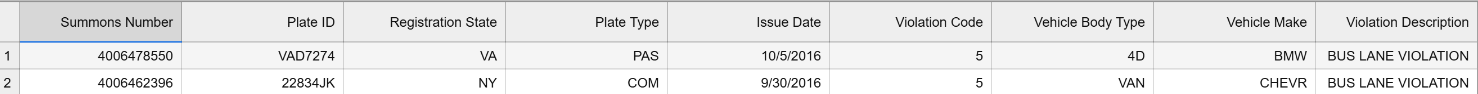

In [108]:
from collections import namedtuple

FILE = r'data/nyc_parking_tickets_extract.csv'

In [109]:
def get_column_headers(file):
    with open(file, 'r') as f:
        attrs = f.readline().strip('\n').replace(' ', '_')
        Ticket = namedtuple('Ticket', attrs)
    return Ticket

In [110]:
Ticket = get_column_headers(FILE)
Ticket

__main__.Ticket

In [111]:
dir(Ticket)[:9]

['Issue_Date',
 'Plate_ID',
 'Plate_Type',
 'Registration_State',
 'Summons_Number',
 'Vehicle_Body_Type',
 'Vehicle_Make',
 'Violation_Code',
 'Violation_Description']

In [112]:
from datetime import datetime

def process_tickets(file):
    with open(file, 'r') as f:
        next(f)
        for line in f:
            cells = line.strip('\n').split(',')
            sum_number = int(cells[0])
            issue_date = datetime.strptime(cells[4], "%m/%d/%Y")
            violation_code = int(cells[5])
            yield Ticket(sum_number, *cells[1:4], issue_date, violation_code, *cells[6:])

In [113]:
gen = process_tickets(FILE)

In [114]:
next(gen)

Ticket(Summons_Number=4006478550, Plate_ID='VAD7274', Registration_State='VA', Plate_Type='PAS', Issue_Date=datetime.datetime(2016, 10, 5, 0, 0), Violation_Code=5, Vehicle_Body_Type='4D', Vehicle_Make='BMW', Violation_Description='BUS LANE VIOLATION')

In [115]:
next(gen)

Ticket(Summons_Number=4006462396, Plate_ID='22834JK', Registration_State='NY', Plate_Type='COM', Issue_Date=datetime.datetime(2016, 9, 30, 0, 0), Violation_Code=5, Vehicle_Body_Type='VAN', Vehicle_Make='CHEVR', Violation_Description='BUS LANE VIOLATION')

#### Goal 2

The 2nd goal of this project is to calculate the number of violations by car make.

In [102]:
dict_violations = {}

In [103]:
gen = process_tickets(FILE)

for tick in gen:
    dict_violations[tick.Vehicle_Make] = dict_violations.get(tick.Vehicle_Make, 0) + 1

In [107]:
for key, val in sorted(dict_violations.items(), key=lambda x: x[1], reverse=True):
    print(key if key else "N/A", val)

TOYOT 112
HONDA 106
FORD 104
CHEVR 76
NISSA 70
DODGE 45
FRUEH 44
ME/BE 38
GMC 35
HYUND 35
BMW 34
LEXUS 26
INTER 25
JEEP 22
NS/OT 18
SUBAR 18
INFIN 13
LINCO 12
CHRYS 12
ACURA 12
AUDI 12
VOLVO 12
MITSU 11
ISUZU 10
CADIL 9
KIA 8
VOLKS 8
HIN 6
KENWO 5
N/A 5
ROVER 5
BUICK 5
MAZDA 5
MERCU 4
JAGUA 3
SMART 3
PORSC 3
WORKH 2
SATUR 2
SCION 2
SAAB 2
HINO 2
FIR 1
OLDSM 1
PETER 1
CITRO 1
GEO 1
YAMAH 1
BSA 1
MINI 1
PONTI 1
SPRI 1
PLYMO 1
UPS 1
FIAT 1
UD 1
UTILI 1
GMCQ 1
STAR 1
AM/T 1
MI/F 1
